## 实验：搭建三层神经网络

### 实验概要

掌握了 NumPy 多维数组的运算，就可以高效地实现神经网络。首先，复习一下 Numpy 数组的知识点。

#### 多维数组

简单地讲，多维数组就是“数字的集合”，数字排成一列的集合、排成长方形的集合、排成三维状或者（更加一般化的）N 维状的集合都称为：**多维数组**。Python 的索引从 **`0`** 开始，因此，第一个维度对应第 0 维，第二个维度对应第 1 维，以此类推。二维数组也称为：**矩阵（matrix）**。数组的横向排列称为 **行（row）**，纵向排列称为 **列（column）**。

下面我们创建一个具有两个平面的三维数组 (**Three dimensional (3D) array**)：

![](./img/1_04.png)

其中，数组的维数可以通过 `np.ndim()` 函数获得，数组的形状可以通过实例变量 `shape` 获得，如下代码所示：

In [1]:
import numpy as np # 导入numpy科学计算库

# 创建一个三维数组
A = np.array([[[1,2],[3,4]],
              [[5,6],[7,8]]])
print(A)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [2]:
# 输出数组维数，输出 "3"
np.ndim(A) 

3

In [3]:
# 输出数组形状，输出"(2,2,2)"
A.shape   

(2, 2, 2)

`shape` 输出的形状 `(2, 2, 2)` 分别代表三维数组的：平面数，行数，列数 

#### 矩阵乘积 Matrix Multiplication 与点积函数 np.dot ()

下面，复习矩阵（二维数组）的乘积。矩阵相乘的标准方法，不是将一个矩阵中的每个元素与另一个矩阵的每个元素相乘（这称为：按元素的乘积 Element-Wise Product）。矩阵乘积，是指计算行与列之间的乘积之和。矩阵乘积，也称为 **点积 (dot product)**，计算如下：比如 **2×2** 的矩阵，其乘积可以如下图这样进行计算：

<img src="./img/3_04.png" width="80%">

使用 `np.dot()` 函数实现矩阵乘积，代码如下：

In [4]:
# 创建数组
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

# 执行点积运算
np.dot(A, B)

array([[19, 22],
       [43, 50]])

在运算矩阵乘积时需要注意：

1. 相乘的顺序很重要，AB != BA
2. 如果第一个矩阵的列数（column），等于第二个矩阵的行数（row），则矩阵可以相乘

再举一个例子 ——

<img src="./img/4_04.png" width="50%">

使用 `np.dot()` 函数实现矩阵乘积，代码如下：

In [5]:
# 创建数组
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[10,11], [20,21], [30,31]])

# 执行点积运算
np.dot(A, B)

array([[140, 146],
       [320, 335]])

最后一个例子，将 **1x5** 与 **5x1** 矩阵相乘。

<img src="./img/5_04.png" width="60%">

使用 `np.dot()` 函数实现矩阵乘积，代码如下：

In [6]:
# 创建数组
A = np.array([[1,2,3,4,5]])
B = np.array([[10],
              [20],
              [30],
              [40],     
              [50]])

# 执行点积运算
np.dot(A,B)

array([[550]])

#### 神经网络的内积 (Inner product)

让我们看一下典型神经网络中的单个神经元。它从其他单元接收输入 $\left\{x_{1}, \ldots, x_{n}\right\}$  并产生输出 ***y***，为了计算输出，我们将每个输入与相应的权重 $\left\{w_{1}, \ldots, w_{n}\right\}$ 进行乘积。权重值确定每个输入的连接强度。我们将权重值与输入的乘积求和，然后加上一个偏置（bias） ***b***，以获得输入的总量。最终的输出 ***y***，就是通过以输入总量作为参数，运算激活函数 ***f*** 而获得的。激活函数通常是非线性的，例如 **sigmoid** 和 **Relu**。因此，我们有该神经元的输出公式：

$$
y=f\left(\sum_{i=1}^{n} w_{i} x_{i}+b\right)
$$

权重与输入的乘积求和，可以重写为点积，将向量 $\left\{x_{1}, \ldots, x_{n}\right\}$ 定义为输入，向量 $\left\{w_{1}, \ldots, w_{n}\right\}$ 定义为权重，通过点积定义有：

$$
\sum_{i=1}^{n} w_{i} x_{i}=w \cdot x
$$

将其重新代入到到输出的公式中：

$$
y=f(w \cdot x+b)
$$

In [7]:
import numpy as np

# 设置输入 {X1...Xn}
x = np.array([1, 2]) 
# 显示x形状
x.shape              

(2,)

In [8]:
# 设置权重 {W1...Wn} ，
# [[1, 3, 5],
# [2, 4, 6]]
# 注意 X 的列数等于 W 的行数
w = np.array([[1, 3, 5], [2, 4, 6]]) 
# 输出权重值矩阵
print(w) 

[[1 3 5]
 [2 4 6]]


In [9]:
w.shape  # 显示w形状

(2, 3)

In [10]:
# 设置偏置量b(bias)
b = [1, 2, 3]        
# 将点积加上偏置量 b，求出 y，
y = np.dot(x, w) + b 

# 输出 "[ 6 13 20]"
print(y)

[ 6 13 20]


正因为点积的出现，我们不需要对每一个输入 **x** 与权重 **w** 进行逐一相乘，使用 **`np.dot`**（多维数组的点积函数），就可以一次性计算出 **y** 的结果。

### 实验目标

本实验中，我们首先使用 NumPy 数组，用很少的代码，实现从神经网络输入到输出的（前向）处理。我们将实现这样一个三层神经网络：输入层（第 0 层）有两个神经元，第一个隐藏层（第 1 层）有三个神经元，第二个隐藏层（第 2 层）有两个神经元，输出层（第 3 层）有两个神经元。另外，我们在前面两个隐藏层会使用 **Sigmoid** 作为激活函数，而在最后的输出层则使用 **恒等函数** (直接输出)。

![](./img/3layersnn_04.png)

之后，我们将通过 MNIST 手写数字数据集体验案例，重新搭建一个简单而完整的三层神经网络，包含：输入层，隐含层和输出层，让你体验并实现将深度学习神经网络应用到手写数字识别中。MNIST 手写数字数据集是一个小规模的神经网络的训练和测试数据集，也是经典的深度学习的基准数据集，在深度学习的课程群中会被反复应用。本实验中的 MNIST 数据集所存储数据文件为 CSV 文件，每一个码值都是由逗号分隔，对于每行（最左边有行号）的数值，开头的第一个在值是标签，即书写者希望表示的数字，如第一行的 “5”、第二行的 “0”。随后的 **784** 个值，由逗号分隔，是手写数字的像素值，像素数组的尺寸是 **`28*28`**（即 `784`）,这 784 个像素值是手写数字的 **`28*28`** 的图片对应的 **784** 个位置的像素值。

![](img/0_FLD5PNYJgWknPvJQ_04.gif)

### 1. 导入库

In [11]:
# 导入numpy科学计算库，支持维度数组与矩阵运算
import numpy as np             
# 导入matplotlib绘图库
import matplotlib.pylab as plt 

# 魔法命令，使matplotlib图形直接在jupyter notebook中显示
%matplotlib inline

### 2. 层间信号传递的实现

图例约定如下：

<img src="./img/8_04.png" width="50%">

以输入层（第 0 层）到第一个隐藏层（第 1 层）的信号传递为例：

<img src="./img/7_04.png" width="50%">

其中 ——

- $b_{1}^{(1)}$ 为第 1 层偏置量
- **x<sub>1</sub>**，**x<sub>2</sub>** 为输入
- $W_{11}^{(1)}$ 和 $W_{12}^{(1)}$ 分别为第 1 层对应输入层（第 0 层）第 1，第 2 个神经元，到第 1 层第 1 个神经元的权重值
- $a_{1}^{(1)}$ 为输入层到第一个隐藏层（第 1 层）中的第一个神经元的输出值

因此，$a_{1}^{(1)}$ 过加权信号和偏置的和，按如下方式进行计算：

$$
a_{1}^{(1)}=w_{11}^{(1)} x_{1}+w_{12}^{(1)} x_{2}+b_{1}^{(1)}
$$

同理，我们还需要算出 $a_{2}^{(1)}$ ，和 $a_{3}^{(1)}$ 的值，这样一来运算会很繁琐。

由于我们有矩阵点积运算和 Numpy 的 **np.dot()** 函数，就可以对所有的输入、权重进行打包运算。因此，将第 1 层的加权和表示成下面的式：

$$
\boldsymbol{A}^{(1)}=\boldsymbol{X} \boldsymbol{W}^{(1)}+\boldsymbol{B}^{(1)}
$$

其中：

$$
\begin{array}{l}
\boldsymbol{A}^{(1)}=\left(\begin{array}{lll}
a_{1}^{(1)} & a_{2}^{(1)} & a_{3}^{(1)}
\end{array}\right), \boldsymbol{X}=\left(\begin{array}{ll}
x_{1} & x_{2}
\end{array}\right), \boldsymbol{B}^{(1)}=\left(\begin{array}{lll}
b_{1}^{(1)} & b_{2}^{(1)} & b_{3}^{(1)}
\end{array}\right) \\
\boldsymbol{W}^{(1)}=\left(\begin{array}{lll}
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{array}\right)
\end{array}
$$

这样一来，我们就可以通过一次运算将输入、权重、偏置值同时打包运算，从而运算出第一次所有神经元的加权和（一个数组）。

下面我们用 NumPy 多维数组来实现，这里将输入信号、权重、偏置设置成任意值：

In [12]:
# 定义 x1，x2 输入
X = np.array([1.0, 0.5]) 

# 定义第1层权重值，矩阵分别对应两个输入（x1，x2）和三个神经元（a1，a2，a3）
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  

# 定义第1层偏置值，对应三个第 1 层的神经元
B1 = np.array([0.1, 0.2, 0.3])                     

# (2, 3)
print(W1.shape) 
# (2,)
print(X.shape) 
# (3,)
print(B1.shape) 

# 求第 1 层的加权和
A1 = np.dot(X, W1) + B1    
# 这里实际上包含了 a1，a2，a3 三个神经元的加权和
# [0.3 0.7 1.1]
print(A1)   

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


#### 将加权和代入激活函数

完成加权和的运算后，我们还需要将其代入激活函数，才真正得到该层的输出。从上面的代码运算中，你应该可以理解到，虽然在图中的为了讲解方便，用黑色线强调的是第 1 层的第 1 个神经元，但实际上在真正运算中是将 3 个神经元作为数组同时代入激活函数运算。

<img src="./img/9_04.png" width="50%">

隐藏层的加权和（加权信号和偏置的总和）用 **a** 表示，被激活函数转换后的信号用 **z** 表示。此外，图中 **h()** 表示激活函数，这里我们使用的是 **sigmoid** 函数。

In [13]:
# 定义激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

# 将 A1 代入激活函数，使三个第 1 层的神经元 a1, a2, a3 的加权和同时代入激活函数运算
Z1 = sigmoid(A1) 

#  代入参数 A1
# [0.3, 0.7, 1.1]                            
print(A1) 
#  激活函数 sigmoid 运算后的结果 
# [0.57444252, 0.66818777, 0.75026011] 
print(Z1)       

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


#### 实现第 1 层到第 2 层的信号传递

除了将刚刚运算出来的第 1 层的输出（**Z1**）变成了第 2 层的输入以外，这个实现和刚才的代码完全相同。由此可知，通过使用 NumPy 数组，可以将层到层的信号传递过程简单地写出来。

<img src="./img/10_04.png" width="50%">

In [14]:
# 定义第2层权重值，矩阵分别对应三个输入（z1，z2, z3）和两个神经元（a1，a2）
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) 

# 定义第2层偏置值，对应两个第 2 层的神经元
B2 = np.array([0.1, 0.2])                           

# (3,)
print(Z1.shape) 
# (3, 2)
print(W2.shape) 
# (2,)
print(B2.shape) 

# 求第 2 层的加权和
A2 = np.dot(Z1, W2) + B2  

# 将 A2 代入激活函数，使两个第 2 层的神经元 a1, a2 的加权和同时代入激活函数运算
Z2 = sigmoid(A2)          
#  激活函数 sigmoid 运算后的结果 
print(Z2)                 

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


#### 实现第 2 层到输出层的信号传递

最后是第 2 层到输出层的信号传递。输出层的实现也和之前的实现基本相同。不过，这里我们定义了 `identity_function()` 函数（也称为 **恒等函数**），并将其作为输出层的激活函数。在数学里，恒等函数为一无任何作用的函数：它总是传回和其引数相同的值。换句话说，恒等函数为函数 ***f(x)=x***

<img src="./img/11_04.png" width="50%">

In [15]:
# 定义恒等函数
def identity_function(x):
     return x

# 定义第3层权重值，矩阵分别对应两个输入（z1，z2）和两个神经元（a1，a2）
W3 = np.array([[0.1, 0.3], [0.2, 0.4]]) 

# 定义第3层偏置值，对应两个第 3 层（输出层）的神经元
B3 = np.array([0.1, 0.2])               

# 求第 3 层（输出层）的加权和
A3 = np.dot(Z2, W3) + B3  
# 或者Y = A3
Y = identity_function(A3) 
# 输出 [ 0.31682708 0.69627909]
print(Y)                  

[0.31682708 0.69627909]


### 3. 代码小结与整理

至此，我们已经介绍完了三层神经网络的实现。现在我们把之前的代码实现全部整理一下。这里，我们按照神经网络的实现惯例，只把权重记为大写字母 W1，其他的（偏置或中间结果等）都用小写字母表示。另外，我们定义了 `init_network()` 和 `forward()` 函数。

- `init_network()` 函数：进行权重和偏置的初始化，并将它们保存在字典变量 network 中。这个字典变量 network 中保存了每一层所需的参数（权重和偏置）
- `forward()` 函数：封装了将输入信号转换为输出信号的处理过程。

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

# [ 0.31682708 0.69627909]
print(y) 

[0.31682708 0.69627909]


可以看到，最后得到与分部实现相同的运算结果。至此，你已成功实现了第一个三层神经网络。

### 4. 创建 MNIST 神经网络类

在实验的第一部分，我们通过使用 sigmoid 激活函数完成了第一个三层神经网络的构建。然而，我们依然是通过手动配置输入、权重、偏置量等参数来进行运算；而实际上，真正的深度学习网络可以通过输入数据与输出结果之间的对比，自动得到各种参数 —— 这个过程就是 **模型训练**。

在实验的第二部分，我们将让你体验并实现如何将深度学习神经网络应用到手写数字识别中，让你尽快对一个完整的深度学习神经网络的运行流程建立初步认知。我们对代码进行了详细的注释，但不会把所有的概念一次性灌输给你。在后续的课程中，我们将通过独立的实验操作，逐步使你深刻理解相关的概念。

In [17]:
# 导入scipy科学计算库，支持大量科学运算函数
import scipy.special           
# 导入glob通配符查找库
import glob                    

上面的代码中，我们先补充两个在实验的第二部分应用到的两个库。

In [18]:
class neuralNetwork :
    
    # 初始化神经网络
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate) :
        
        # 设置输入层、隐含层和输出层节点数
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 权重值
        self.wih = np.random.normal(0.0, pow(self.hnodes,-0.5), 
                                    (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes,-0.5), 
                                    (self.onodes, self.hnodes))
        
        # 学习率
        self.lr = learningrate
        
        # sigmoid激活函数
        self.activation_function = lambda x:scipy.special.expit(x)
        pass
    
    # 训练模型
    def train(self, inputs_list, targets_list) :
        
        # 将输入转换为2维数组
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # 计算隐藏层的输入
        hidden_inputs = np.dot(self.wih,inputs)
        
        # 隐藏层输入通过激活函数变换
        hidden_outputs = self.activation_function(hidden_inputs) 
        
        # 计算输出
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # 计算输出的损失值
        output_errors = targets - final_outputs
        
        # 计算隐藏层的损失值
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # 更新隐藏层和输出层之间的权重值
        self.who += self.lr*np.dot((output_errors*final_outputs*(1.0 - final_outputs)), 
                                   np.transpose(hidden_outputs))
        
        # 更新隐藏层和输入层之间的权重值
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)), 
                                   np.transpose(inputs))
        
        pass
    
    # 查询神经网络
    def query(self, inputs_list) :
        
        # 将输入列表转换为2维数组
        inputs = np.array(inputs_list, ndmin=2).T
        
        # 计算隐藏层的输入
        hidden_inputs = np.dot(self.wih,inputs)
        
        # 隐藏层的激活函数变换
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #计算输出层的输出值
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

### 5. 设置参数

In [19]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 学习率
learning_rate = 0.3

### 6. 创建神经网络实例

In [20]:
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

### 7. 加载训练数据

这里数据集为 `mnist_train_100.csv`

In [21]:
# 设置路径
import os
base_path = os.environ.get("BATH_PATH",'./data/')
data_path = os.path.join(base_path + "lab4/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

In [22]:
training_data_file = open(data_path+"mnist_train_100.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

### 8. 模型训练

In [23]:
for record in training_data_list:
    all_values = record.split(',')
    
    # 缩放和变换输入
    inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    
    # 创建目标输出值（除了标签为0.99，其余的都为0.01）
    targets = np.zeros(output_nodes)+0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    n.query(inputs)
    pass

### 9. 测试训练模型

array([[0.03821187],
       [0.01600562],
       [0.0408104 ],
       [0.03528962],
       [0.06528017],
       [0.03878796],
       [0.01267818],
       [0.85936343],
       [0.04757153],
       [0.08060646]])

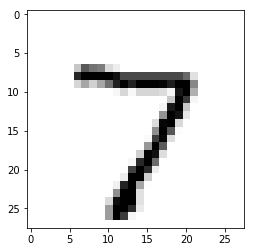

In [24]:
#加载测试数据
test_data_file = open(data_path+"mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#显示预测概率和图片
all_values = test_data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation = 'None')
n.query((np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01)

### 实验小结

在本实验中，你完成了神经网络的前向处理的实现。通过巧妙地使用 NumPy 多维数组，高效地实现了神经网络。另外，你还通过使用 MNIST 数据集，通过应用深度学习神经网络，实现了对手写数字的识别 —— 在实验的第二部分，你可能会碰到很多陌生的概念。没有关系，这里仅仅是为了让你尽快体验一个完整的深度学习神经网络的运行流程。我们会在后续的课程中逐个进行深入的介绍与实验，使你深刻理解相关概念。